In [46]:
import os
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
path = "nhnaes-dataset"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)


Files and directories in ' nhnaes-dataset ' :
['dietary_clean.csv', 'occupation_clean.csv', 'occupations_unclean.csv', 'example_0 - merge_datasets_together.Rmd', 'comments_unclean.csv', 'comments_clean.csv', 'chemicals_unclean.csv', 'weights_unclean.csv', 'dictionary_nhanes.csv', 'dietary_unclean.csv', 'nhanes_inconsistencies_documentation.xlsx', 'm - nhanes_1988_2018.R', 'weights_clean.csv', 'example_1 - account_for_nhanes_design.Rmd', 'w - nhanes_1988_2018.RData', 'medications_unclean.csv', 'response_clean.csv', 'mortality_unclean.csv', 'questionnaire_unclean.csv', 'demographics_unclean.csv', 'example_3 - run_multiple_regressions.Rmd', 'demographics_clean.csv', 'mortality_clean.csv', 'medications_clean.csv', 'dictionary_harmonized_categories.csv', 'chemicals_clean.csv', 'response_unclean.csv', 'dictionary_drug_codes.csv', 'example_2 - calculate_summary_statistics.Rmd', 'questionnaire_clean.csv']


In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [50]:
df = pd.read_csv("nhnaes-dataset/dietary_clean.csv")
df.head()

,Unnamed: 0,SEQN_new,SEQN,SDDSRVYR,RIDAGEYR,RIAGENDR,survey_day,WTDRD1,WTDR4YR,DRXEXMER,DRASCST2,DRDAINMD,DRDINTMD,DRXDAY,DRXLANG,DRXDRSTZ,DRXMRESP,DRXTNUMF,WTDRXD,DRABF,DRDINT,DRXHELP,DRXDBIH,DRPIID,DRPQ5,DRPQ6,DRPQ7,DRPQ8,DRPQ9,DRPQ10,DRPQ11,DRPQ12,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVAIU,DRXTVARA,DRXTCARO,DRXTVB1,DRXTVB2,DRXTNIAC,DRXTVB6,DRXTFOLA,DRXTVB12,DRXTVC,DRXTATOC,DRXTCALC,DRXTPHOS,DRXTMAGN,DRXTIRON,DRXTZINC,DRXTCOPP,DRXTSODI,DRXTPOTA,DRXTSELE,DRXTCAFF,DRXTTHEO,DRXTALCO,DRXTMOIS,DRXTS040,DRXTS060,DRXTS080,DRXTS100,DRXTS120,DRXTS140,DRXTS160,DRXTS180,DRXTM161,DRXTM181,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRXTSUGR,DRXTRET,DRXTACAR,DRXTBCAR,DRXTCRYP,DRXTLYCO,DRXTLZ,DRXTFA,DRXTFF,DRXTFDFE,DRXTVK,DRXTATOA,DRXTB12A,DRXTCHL,DRXTVD,DRPGW,DRPNVAIU,DRPNVE,DRPNKF,DRPNKSF,DRPNKMF,DRPNKPF,DRPNKP,DRPNKC,DRPNKA,NCPGW,NCPNWATE,NCPNKCAL,NCPNPROT,NCPNTFAT,NCPNSFAT,NCPNMFAT,NCPNPFAT,NCPNCHOL,NCPNCARB,NCPNFIBE,NCPNALCO,NCPNVAIU,NCPNVE,NCPNVC,NCPNVB1,NCPNVB2,NCPNNIAC,NCPNVB6,NCPNFOLA,NCPNVB12,NCPNCALC,NCPNPHOS,NCPNMAGN,NCPNIRON,NCPNZINC,NCPNCOPP,NCPNSODI,NCPNPOTA,NCPNCFIB,NCPNASH,NCPNPACI,NCPNBTOC,NCPNGTOC,NCPNDTOC,NCPNS170,NCPNS200,NCPNS220,NCPNM141,NCPNGLUC,NCPNFRUC,NCPNGALA,NCPNSUCR,NCPNLACT,NCPNMALT,NCPNIFIB,NCPNSFIB,NCPNPECT,NCPNSTAR,NCPNASPR,NCPNTRYP,NCPNTHRE,NCPNISOL,NCPNLEUC,NCPNLYSI,NCPNMETH,NCPNCYST,NCPNPHAL,NCPNTYRO,NCPNVALI,NCPNARGI,NCPNHIST,NCPNALAN,NCPNASPA,NCPNGLUT,NCPNGLYC,NCPNPROL,NCPNSERI,NCPNSACC,NCPNAPRO,NCPNVPRO,NCPNOXAA,NCPNPHYA,NCPNKF,NCPNKSF,NCPNKMF,NCPNKPF,NCPNKP,NCPNKC,NCPNKA,DRXT_G_TOTAL,DRXT_G_WHOLE,DRXT_G_REFINED,DRXT_V_TOTAL,DRXT_V_DRKGR,DRXT_V_REDOR_OTHER,DRXT_V_STARCHY_POTATO,DRXT_V_STARCHY_OTHER,DRXT_V_REDOR_TOMATO,DRXT_V_OTHER,DRXT_F_TOTAL,DRXT_F_CITMLB,DRXT_F_OTHER,DRXT_D_TOTAL,DRXT_D_MILK,DRXT_D_YOGURT,DRXT_D_CHEESE,DRXT_PF_MPS_TOTAL,DRXT_PF_MEAT,DRXT_PF_ORGAN,DRXT_PF_CUREDMEAT,DRXT_PF_POULT,DRXT_PF_SEAFD_HI,DRXT_PF_SEAFD_LOW,DRXT_PF_EGGS,DRXT_PF_SOY,DRXT_PF_NUTSDS,DRXT_V_LEGUMES,DRXT_OILS,DRXT_SOLID_FATS,DRXT_ADD_SUGARS,DRXT_A_DRINKS,DRXT_F_JUICE,DRXT_V_REDOR_TOTAL,DRXT_V_STARCHY_TOTAL,DRXT_PF_LEGUMES,DRXT_PF_TOTAL,DRX.300,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT91,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRX.320Z,DRX.330Z,DRXCWATR,DRXBWATZ,DRXTWSZ,DRDTSODF,DBD100,DBQ095Z,DRQSPREP,DRXSTY,DRXSKY,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,VNDRXS0406,VNDRXS081012,VNDRXS1416,VNDRXS141618,VNDRXSMFAT,VNDRXSSFAT,VNDRXSPFAT
0,1,I-3,3.0,-1,21.0,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2.0,NaN,NaN,NaN,NaN,3.0,2726.000000,85.000000,371.500000,106.600000,39.30000,43.500000,14.400000,281.000000,20.600000,NaN,138.676146,329.0,1.410000,1.470000,26.800000,2.720000,184.000000,6.420000,113.000000,9.500000,543.000000,1181.000000,289.000000,14.800000,15.400000,2.300000,5216.000000,4350.000000,94.800000,68.000000,NaN,0.000,1650.000000,0.400000,0.100000,0.100000,0.400000,0.500000,3.300000,25.200000,15.400000,3.400000,43.700000,0.000000,0.000000,9.600000,1.100000,0.000000,0.200000,0.000000,0.000000,0.000000,NaN,289.000000,NaN,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1000,1990.0,4342.0,10.7,35.2,13.0,14.4,4.7,12.5,54.5,0.0,1990.0,1659.0,2818.0,89.6,116.5,46.7,48.1,11.0,313.0,366.1,20.4,0.0,4287.0,11.2,106.0,1.45,1.55,28.1,2.68,167.0,6.52,554.0,1225.0,300.0,17.1,16.2,2.5,5145.0,4322.0,5.8,25.0,6.1,0.1,16.5,4.7,0.0,0.0,0.0,0.0,60.3,52.4,0.0,74.4,

In [51]:
df.columns.tolist()

['Unnamed: 0',
 'SEQN_new',
 'SEQN',
 'SDDSRVYR',
 'RIDAGEYR',
 'RIAGENDR',
 'survey_day',
 'WTDRD1',
 'WTDR4YR',
 'DRXEXMER',
 'DRASCST2',
 'DRDAINMD',
 'DRDINTMD',
 'DRXDAY',
 'DRXLANG',
 'DRXDRSTZ',
 'DRXMRESP',
 'DRXTNUMF',
 'WTDRXD',
 'DRABF',
 'DRDINT',
 'DRXHELP',
 'DRXDBIH',
 'DRPIID',
 'DRPQ5',
 'DRPQ6',
 'DRPQ7',
 'DRPQ8',
 'DRPQ9',
 'DRPQ10',
 'DRPQ11',
 'DRPQ12',
 'DRXTKCAL',
 'DRXTPROT',
 'DRXTCARB',
 'DRXTTFAT',
 'DRXTSFAT',
 'DRXTMFAT',
 'DRXTPFAT',
 'DRXTCHOL',
 'DRXTFIBE',
 'DRXTVAIU',
 'DRXTVARA',
 'DRXTCARO',
 'DRXTVB1',
 'DRXTVB2',
 'DRXTNIAC',
 'DRXTVB6',
 'DRXTFOLA',
 'DRXTVB12',
 'DRXTVC',
 'DRXTATOC',
 'DRXTCALC',
 'DRXTPHOS',
 'DRXTMAGN',
 'DRXTIRON',
 'DRXTZINC',
 'DRXTCOPP',
 'DRXTSODI',
 'DRXTPOTA',
 'DRXTSELE',
 'DRXTCAFF',
 'DRXTTHEO',
 'DRXTALCO',
 'DRXTMOIS',
 'DRXTS040',
 'DRXTS060',
 'DRXTS080',
 'DRXTS100',
 'DRXTS120',
 'DRXTS140',
 'DRXTS160',
 'DRXTS180',
 'DRXTM161',
 'DRXTM181',
 'DRXTM201',
 'DRXTM221',
 'DRXTP182',
 'DRXTP183',
 'DRXTP184',
 'D

In [52]:
df.tail()

,Unnamed: 0,SEQN_new,SEQN,SDDSRVYR,RIDAGEYR,RIAGENDR,survey_day,WTDRD1,WTDR4YR,DRXEXMER,DRASCST2,DRDAINMD,DRDINTMD,DRXDAY,DRXLANG,DRXDRSTZ,DRXMRESP,DRXTNUMF,WTDRXD,DRABF,DRDINT,DRXHELP,DRXDBIH,DRPIID,DRPQ5,DRPQ6,DRPQ7,DRPQ8,DRPQ9,DRPQ10,DRPQ11,DRPQ12,DRXTKCAL,DRXTPROT,DRXTCARB,DRXTTFAT,DRXTSFAT,DRXTMFAT,DRXTPFAT,DRXTCHOL,DRXTFIBE,DRXTVAIU,DRXTVARA,DRXTCARO,DRXTVB1,DRXTVB2,DRXTNIAC,DRXTVB6,DRXTFOLA,DRXTVB12,DRXTVC,DRXTATOC,DRXTCALC,DRXTPHOS,DRXTMAGN,DRXTIRON,DRXTZINC,DRXTCOPP,DRXTSODI,DRXTPOTA,DRXTSELE,DRXTCAFF,DRXTTHEO,DRXTALCO,DRXTMOIS,DRXTS040,DRXTS060,DRXTS080,DRXTS100,DRXTS120,DRXTS140,DRXTS160,DRXTS180,DRXTM161,DRXTM181,DRXTM201,DRXTM221,DRXTP182,DRXTP183,DRXTP184,DRXTP204,DRXTP205,DRXTP225,DRXTP226,DRXTSUGR,DRXTRET,DRXTACAR,DRXTBCAR,DRXTCRYP,DRXTLYCO,DRXTLZ,DRXTFA,DRXTFF,DRXTFDFE,DRXTVK,DRXTATOA,DRXTB12A,DRXTCHL,DRXTVD,DRPGW,DRPNVAIU,DRPNVE,DRPNKF,DRPNKSF,DRPNKMF,DRPNKPF,DRPNKP,DRPNKC,DRPNKA,NCPGW,NCPNWATE,NCPNKCAL,NCPNPROT,NCPNTFAT,NCPNSFAT,NCPNMFAT,NCPNPFAT,NCPNCHOL,NCPNCARB,NCPNFIBE,NCPNALCO,NCPNVAIU,NCPNVE,NCPNVC,NCPNVB1,NCPNVB2,NCPNNIAC,NCPNVB6,NCPNFOLA,NCPNVB12,NCPNCALC,NCPNPHOS,NCPNMAGN,NCPNIRON,NCPNZINC,NCPNCOPP,NCPNSODI,NCPNPOTA,NCPNCFIB,NCPNASH,NCPNPACI,NCPNBTOC,NCPNGTOC,NCPNDTOC,NCPNS170,NCPNS200,NCPNS220,NCPNM141,NCPNGLUC,NCPNFRUC,NCPNGALA,NCPNSUCR,NCPNLACT,NCPNMALT,NCPNIFIB,NCPNSFIB,NCPNPECT,NCPNSTAR,NCPNASPR,NCPNTRYP,NCPNTHRE,NCPNISOL,NCPNLEUC,NCPNLYSI,NCPNMETH,NCPNCYST,NCPNPHAL,NCPNTYRO,NCPNVALI,NCPNARGI,NCPNHIST,NCPNALAN,NCPNASPA,NCPNGLUT,NCPNGLYC,NCPNPROL,NCPNSERI,NCPNSACC,NCPNAPRO,NCPNVPRO,NCPNOXAA,NCPNPHYA,NCPNKF,NCPNKSF,NCPNKMF,NCPNKPF,NCPNKP,NCPNKC,NCPNKA,DRXT_G_TOTAL,DRXT_G_WHOLE,DRXT_G_REFINED,DRXT_V_TOTAL,DRXT_V_DRKGR,DRXT_V_REDOR_OTHER,DRXT_V_STARCHY_POTATO,DRXT_V_STARCHY_OTHER,DRXT_V_REDOR_TOMATO,DRXT_V_OTHER,DRXT_F_TOTAL,DRXT_F_CITMLB,DRXT_F_OTHER,DRXT_D_TOTAL,DRXT_D_MILK,DRXT_D_YOGURT,DRXT_D_CHEESE,DRXT_PF_MPS_TOTAL,DRXT_PF_MEAT,DRXT_PF_ORGAN,DRXT_PF_CUREDMEAT,DRXT_PF_POULT,DRXT_PF_SEAFD_HI,DRXT_PF_SEAFD_LOW,DRXT_PF_EGGS,DRXT_PF_SOY,DRXT_PF_NUTSDS,DRXT_V_LEGUMES,DRXT_OILS,DRXT_SOLID_FATS,DRXT_ADD_SUGARS,DRXT_A_DRINKS,DRXT_F_JUICE,DRXT_V_REDOR_TOTAL,DRXT_V_STARCHY_TOTAL,DRXT_PF_LEGUMES,DRXT_PF_TOTAL,DRX.300,DRQSDIET,DRQSDT1,DRQSDT2,DRQSDT3,DRQSDT4,DRQSDT5,DRQSDT6,DRQSDT7,DRQSDT8,DRQSDT91,DRQSDT9,DRQSDT10,DRQSDT11,DRQSDT12,DRX.320Z,DRX.330Z,DRXCWATR,DRXBWATZ,DRXTWSZ,DRDTSODF,DBD100,DBQ095Z,DRQSPREP,DRXSTY,DRXSKY,DRD340,DRD350A,DRD350AQ,DRD350B,DRD350BQ,DRD350C,DRD350CQ,DRD350D,DRD350DQ,DRD350E,DRD350EQ,DRD350F,DRD350FQ,DRD350G,DRD350GQ,DRD350H,DRD350HQ,DRD350I,DRD350IQ,DRD350J,DRD350JQ,DRD350K,DRD360,DRD370A,DRD370AQ,DRD370B,DRD370BQ,DRD370C,DRD370CQ,DRD370D,DRD370DQ,DRD370E,DRD370EQ,DRD370F,DRD370FQ,DRD370G,DRD370GQ,DRD370H,DRD370HQ,DRD370I,DRD370IQ,DRD370J,DRD370JQ,DRD370K,DRD370KQ,DRD370L,DRD370LQ,DRD370M,DRD370MQ,DRD370N,DRD370NQ,DRD370O,DRD370OQ,DRD370P,DRD370PQ,DRD370Q,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V,VNDRXS0406,VNDRXS081012,VNDRXS1416,VNDRXS141618,VNDRXSMFAT,VNDRXSSFAT,VNDRXSPFAT
324369,324370,C-102955,102955.0,10,14.0,2.0,2,27529.854014,NaN,79.0,NaN,NaN,NaN,5.0,1.0,1.0,1.0,11.0,36299.552504,2.0,2.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1617.000000,58.080000,241.630000,48.710000,18.925000,14.356000,9.860000,95.000000,14.800000,NaN,1161.000000,NaN,2.700000,3.346000,27.513000,2.536000,489.000000,8.230000,46.800000,3.470000,1321.000000,1416.000000,212.000000,19.840000,10.800000,0.479000,2947.000000,2215.000000,71.80000,3.0,40.000000,0.000000,1674.070000,0.403000,0.322000,0.312000,0.573000,1.226000,2.135000,9.395000,4.113000,0.371000,14.193000,0.062000,0.002000,9.155000,0.703000,0.000000,0.064000,0.002000,0.014000,0.001000,94.090000,1158.000000,17.000000,55.000000,1.000000,0.000000,419.000000,395.000000,94.000000,764.000000,22.000000,0.000000,4.520000,202.700000,12.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [53]:
# List of recommended columns for the health risk model
dietary_columns = [
    'SEQN',
    'RIDAGEYR',
    'RIAGENDR',
    'DRXTKCAL',
    'DRXTSFAT',
    'DRXTSODI',
    'DRXTFIBE',
    'DRXTSUGR',
    'DRXTALCO',
    'DRXTTFAT',
   'DRXTCARB',
    'DRXT_ADD_SUGARS',
    'DRXT_V_TOTAL',
    'DRXT_F_TOTAL',
    'DRXT_G_WHOLE',
    'DRXT_PF_CUREDMEAT',
    'WTDRD1'
]

# Create the new DataFrame with only these columns
df_dietary = df[dietary_columns]

# You can now check the first few rows of your new DataFrame
print(df_dietary.head())
print("\nMissing Values Count:")
print(df_dietary.isnull().sum())

   SEQN  RIDAGEYR  RIAGENDR     DRXTKCAL  DRXTSFAT     DRXTSODI   DRXTFIBE  \
0   3.0      21.0       1.0  2726.000000  39.30000  5216.000000  20.600000   
1   3.0      21.0       1.0  2670.718424  35.32412  4495.628726  19.887801   
2   4.0      32.0       2.0  2243.000000  26.40000  2778.000000  12.100000   
3   4.0      32.0       2.0  2136.714074  26.31926  3136.605989  14.415006   
4   7.0       3.0       2.0  1520.000000  15.30000  2234.000000  24.800000   

   DRXTSUGR  DRXTALCO    DRXTTFAT    DRXTCARB  DRXT_ADD_SUGARS  DRXT_V_TOTAL  \
0       NaN     0.000  106.600000  371.500000         35.76656      2.826530   
1       NaN     4.220  102.314178  336.643375         28.99090      1.947655   
2       NaN    32.000   63.900000  294.000000         21.02032      0.558080   
3       NaN    13.807   74.073132  270.536334         20.99560      1.336225   
4       NaN     0.000   56.100000  210.000000          0.93701      0.124790   

   DRXT_F_TOTAL  DRXT_G_WHOLE  DRXT_PF_CUREDMEAT  

In [54]:
df_dietary.tail()

,SEQN,RIDAGEYR,RIAGENDR,DRXTKCAL,DRXTSFAT,DRXTSODI,DRXTFIBE,DRXTSUGR,DRXTALCO,DRXTTFAT,DRXTCARB,DRXT_ADD_SUGARS,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_G_WHOLE,DRXT_PF_CUREDMEAT,WTDRD1
324369,102955.0,14.0,2.0,1617.000000,18.925000,2947.000000,14.800000,94.090000,0.000000,48.710000,241.630000,12.84,1.000000,0.000000,1.470000,1.980000,27529.854014
324370,102955.0,14.0,2.0,1584.385843,23.128155,2741.693003,13.385359,106.219350,0.484977,59.160938,223.248783,NaN,0.665408,0.323592,1.208718,0.728912,27529.854014
324371,102956.0,38.0,1.0,1591.000000,15.625000,2077.000000,9.900000,130.680000,0.000000,40.590000,215.310000,29.93,3.520000,0.000000,0.000000,0.000000,69447.414236
324372,102956.0,38.0,1.0,1490.000000,14.593000,3024.000000,5.400000,187.540000,0.000000,39.020000,276.390000,43.93,0.000000,0.000000,0.000000,0.000000,69447.414236
324373,102956.0,38.0,1.0,1915.369180,22.818217,3864.158931,11.185227,142.797166,1.106019,64.404871,262.425812,NaN,1.166514,0.297189,0.402307,0.544419,69447.414236


In [55]:
unique_weights = df['WTDRD1'].nunique()
print(f"\nNumber of unique weight values: {unique_weights}")


Number of unique weight values: 78926


In [56]:
df_demographic_raw = pd.read_csv("nhnaes-dataset/demographics_clean.csv")
df_demographic_raw.columns.tolist()


['SEQN',
 'SEQN_new',
 'AIALANGA',
 'DMAETHN',
 'DMAETHNR',
 'DMARACE',
 'DMARACER',
 'DMDBORN4',
 'DMDCITZN',
 'DMDEDUC',
 'DMDEDUC2',
 'DMDEDUC3',
 'DMDFMSIZ',
 'DMDHHSIZ',
 'DMDHHSZA',
 'DMDHHSZB',
 'DMDHHSZE',
 'DMDHRAGE',
 'DMDHRBR4',
 'DMDHREDU',
 'DMDHRGND',
 'DMDHRMAR',
 'DMDHSEDU',
 'DMDMARTL',
 'DMDSCHOL',
 'DMDYRSUS',
 'DMPCNTYR',
 'DMPCREGN',
 'DMPFIPSR',
 'DMPFSEQ',
 'DMPMETRO',
 'DMQADFC',
 'DMQMILIZ',
 'FIAINTRP',
 'FIALANG',
 'FIAPROXY',
 'HAA1',
 'HAA2',
 'HAA2A',
 'HAA3',
 'HAA4',
 'HAA5',
 'HAA6A',
 'HAA6B',
 'HAA6C',
 'HAA6D',
 'HAD2',
 'HAINTVR',
 'HALANG',
 'HAV10R',
 'HAV11',
 'HAV1S',
 'HAV2S',
 'HAV3S',
 'HAV4S',
 'HAV5',
 'HAV6S',
 'HAV7R',
 'HAV8',
 'HAV9',
 'HAVERS',
 'HAY10',
 'HAY6',
 'HAY7',
 'HAY8',
 'HAY9',
 'HFA13',
 'HFAGERR',
 'HFC1',
 'HFC10',
 'HFC11',
 'HFC7S',
 'HFC8S',
 'HFC9',
 'HFE1',
 'HFE10',
 'HFE11',
 'HFE12',
 'HFE13',
 'HFE14',
 'HFE15',
 'HFE16',
 'HFE17',
 'HFE18',
 'HFE2',
 'HFE3',
 'HFE4',
 'HFE5',
 'HFE6',
 'HFE7',
 'HFE8A',
 'HFE8B

In [57]:

demographic_features = [
  'SEQN',
 'SEQN_new',  'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'INDFMPIR', 
    'DMDEDUC2', 'DMDMARTL', 'DMPMETRO'
]
df_demographic = df_demographic_raw[demographic_features]
df_demographic.head()
print(f"{df_demographic.isnull().sum()}")

SEQN             0
SEQN_new         0
RIDAGEYR         0
RIAGENDR         0
RIDRETH3     96154
INDFMPIR     12606
DMDEDUC2     60310
DMDMARTL     39886
DMPMETRO    101316
dtype: int64


In [58]:
df_demographic.nunique()

SEQN        101316
SEQN_new    135310
RIDAGEYR        91
RIAGENDR         2
RIDRETH3         6
INDFMPIR      1939
DMDEDUC2         7
DMDMARTL         8
DMPMETRO         2
dtype: int64

In [2]:
pd.set_option('display.max_columns', None)  # No limit on column display

df_health_raw = pd.read_csv("nhnaes-dataset/response_clean.csv",    low_memory=False)
df_health_raw.columns.tolist()

['SEQN',
 'SEQN_new',
 'SDDSRVYR',
 'LBXSATSI2',
 'LBXSATSI',
 'LBXSATSI1',
 'LBDSATLC',
 'LBDSALSI2',
 'LBXSAL2',
 'URXUMA2',
 'LBDSALSI',
 'LBDSALSI1',
 'LBXSAL',
 'LBXSAL1',
 'URXUMA',
 'URXUMA1',
 'URXUMS',
 'LBXSAPSI2',
 'LBXSAPSI',
 'LBXSAPSI1',
 'RFP2',
 'TEP2',
 'SSTOXG2',
 'L1P',
 'RFP',
 'RFP1',
 'HPP',
 'TEP',
 'TEP1',
 'SSTOXG',
 'SSTOXG1',
 'TMP2',
 'TMP',
 'TMP1',
 'HPPCAG',
 'SSTOXAV',
 'SSTOXM',
 'AAP2',
 'AAPSI2',
 'LBDAPBSI2',
 'LBXAPB2',
 'AAP',
 'AAP1',
 'AAPSI',
 'AAPSI1',
 'LBDAPBSI',
 'LBDAPBSI1',
 'LBXAPB',
 'LBXAPB1',
 'LBXSASSI2',
 'LBXSASSI',
 'LBXSASSI1',
 'LBXSC3SI2',
 'LBXSC3SI',
 'LBXSC3SI1',
 'LBDSTBSI2',
 'LBXSTB2',
 'LBDSTBSI',
 'LBDSTBSI1',
 'LBXSTB',
 'LBXSTB1',
 'LBDSTBLC',
 'BIAEXSTS',
 'BIAREACT',
 'BIAREACT1',
 'BIAREACT2',
 'BIARESIST',
 'BIARESIST1',
 'BIARESIST2',
 'BIDALPHA',
 'BIDCM',
 'BIDECF',
 'BIDFAT',
 'BIDFC',
 'BIDFFM',
 'BIDFIT',
 'BIDICF',
 'BIDPFAT',
 'BIDRECF',
 'BIDRICF',
 'BIDTBW',
 'BIDTD',
 'BIXC005K',
 'BIXC006K',
 'BIXC007K'

In [60]:
df_health_raw.head()

,SEQN,SEQN_new,SDDSRVYR,LBXSATSI2,LBXSATSI,LBXSATSI1,LBDSATLC,LBDSALSI2,LBXSAL2,URXUMA2,LBDSALSI,LBDSALSI1,LBXSAL,LBXSAL1,URXUMA,URXUMA1,URXUMS,LBXSAPSI2,LBXSAPSI,LBXSAPSI1,RFP2,TEP2,SSTOXG2,L1P,RFP,RFP1,HPP,TEP,TEP1,SSTOXG,SSTOXG1,TMP2,TMP,TMP1,HPPCAG,SSTOXAV,SSTOXM,AAP2,AAPSI2,LBDAPBSI2,LBXAPB2,AAP,AAP1,AAPSI,AAPSI1,LBDAPBSI,LBDAPBSI1,LBXAPB,LBXAPB1,LBXSASSI2,LBXSASSI,LBXSASSI1,LBXSC3SI2,LBXSC3SI,LBXSC3SI1,LBDSTBSI2,LBXSTB2,LBDSTBSI,LBDSTBSI1,LBXSTB,LBXSTB1,LBDSTBLC,BIAEXSTS,BIAREACT,BIAREACT1,BIAREACT2,BIARESIST,BIARESIST1,BIARESIST2,BIDALPHA,BIDCM,BIDECF,BIDFAT,BIDFC,BIDFFM,BIDFIT,BIDICF,BIDPFAT,BIDRECF,BIDRICF,BIDTBW,BIDTD,BIXC005K,BIXC006K,BIXC007K,BIXC008K,BIXC009K,BIXC010K,BIXC011K,BIXC012K,BIXC013K,BIXC014K,BIXC015K,BIXC016K,BIXC018K,BIXC020K,BIXC023K,BIXC025K,BIXC028K,BIXC031K,BIXC035K,BIXC039K,BIXC043K,BIXC050K,BIXC054K,BIXC060K,BIXC067K,BIXC075K,BIXC083K,BIXC093K,BIXC100K,BIXC115K,BIXC128K,BIXC143K,BIXC159K,BIXC177K,BIXC1M,BIXC200K,BIXC220K,BIXC245K,BIXC273K,BIXC304K,BIXC339K,BIXC378K,BIXC421K,BIXC469K,BIXC500K,BIXC582K,BIXC649K,BIXC723K,BIXC806K,BIXC898K,BIXS005K,BIXS006K,BIXS007K,BIXS008K,BIXS009K,BIXS010K,BIXS011K,BIXS012K,BIXS013K,BIXS014K,BIXS015K,BIXS016K,BIXS018K,BIXS020K,BIXS023K,BIXS025K,BIXS028K,BIXS031K,BIXS035K,BIXS039K,BIXS043K,BIXS050K,BIXS054K,BIXS060K,BIXS067K,BIXS075K,BIXS083K,BIXS093K,BIXS100K,BIXS115K,BIXS128K,BIXS143K,BIXS159K,BIXS177K,BIXS1M,BIXS200K,BIXS220K,BIXS245K,BIXS273K,BIXS304K,BIXS339K,BIXS378K,BIXS421K,BIXS469K,BIXS500K,BIXS582K,BIXS649K,BIXS723K,BIXS806K,BIXS898K,PEPPACE1,PEPPACE2,PERPACE,PERPREG,BPAARM,BPAARM1,BPAARM2,BPACSZ,BPACSZ1,BPACSZ2,BPAEN1,BPAEN2,BPAEN3,BPAEN4,BPQ150A,BPQ150B,BPQ150B1,BPQ150B2,BPQ150C,BPQ150D,BPXCHR,BPXDAR,BPXDB,BPXDI1,BPXDI11,BPXDI12,BPXDI1519,BPXDI15191,BPXDI15192,BPXDI2,BPXDI21,BPXDI22,BPXDI2519,BPXDI25191,BPXDI25192,BPXDI3,BPXDI31,BPXDI32,BPXDI3519,BPXDI35191,BPXDI35192,BPXDI4,BPXML1,BPXML11,BPXML12,BPXPLS,BPXPLS1,BPXPLS2,BPXPTY,BPXPULS,BPXPULS1,BPXPULS2,BPXSAR,BPXSY1,BPXSY11,BPXSY12,BPXSY2,BPXSY21,BPXSY22,BPXSY3,BPXSY31,BPXSY32,BPXSY4,PEASCCT1,PEASCST1,PEASCTM1,PEP6G41,PEP6G42,PEP6H411,PEP6H412,PEP6I41,PEP6I42,PEPNOK1R11,PEPNOK1R12,PERNOK5R,VNAVEBPXSY,VNAVEBPXSY1,VNAVEBPXSY2,VNLBAVEBPXDI,LBDSBUSI,LBDSBUSI2,LBXSBU2,LBDSBUSI1,LBXSBU,LBXSBU1,BMAAMP,BMAEXCMT,BMAEXLEN,BMAEXSTS,BMALLEXT,BMALLKNE,BMALOREX,BMALORKN,BMAULEXT,BMAUPLEL,BMAUPREL,BMAUREXT,BMDARMLF,BMDAVSAD,BMDBMIC,BMDCALFF,BMDLEGF,BMDRECUF,BMDSADCM,BMDSTATS,BMDSUBF,BMDTHICF,BMIARMC,BMIARML,BMICALF,BMIHEAD,BMIHIP,BMIHT,BMILEG,BMIRECUM,BMISUB,BMITHICR,BMITRI,BMIWAIST,BMIWT,BMPBIAC,BMPBIAC1,BMPBIAC2,BMPBIIL,BMPBIIL1,BMPBIIL2,BMPBUTTO,BMPBUTTO1,BMPBUTTO2,BMPELB,BMPELB1,BMPELB2,BMPHTFLG1,BMPHTFLG2,BMPHTIN,BMPHTIN1,BMPHTIN2,BMPKNEE,BMPKNEE1,BMPKNEE2,BMPRECFL1,BMPRECFL2,BMPSITHT,BMPSITHT1,BMPSITHT2,BMPSRWL,BMPSRWL1,BMPSRWL2,BMPSUP,BMPSUP1,BMPSUP2,BMPTECH11,BMPTECH12,BMPTHI,BMPTHI1,BMPTHI2,BMPWHR,BMPWHR1,BMPWHR2,BMPWRIST,BMPWRIST1,BMPWRIST2,BMPWTFLG1,BMPWTFLG2,BMPWTLBS,BMPWTLBS1,BMPWTLBS2,BMXARMC,BMXARMC1,BMXARMC2,BMXARML,BMXARML1,BMXARML2,BMXBMI,BMXBMI1,BMXBMI2,BMXCALF,BMXHEAD,BMXHEAD1,BMXHEAD2,BMXHIP,BMXHT,BMXHT1,BMXHT2,BMXLEG,BMXLEG1,BMXLEG2,BMXRECUM,BMXRECUM1,BMXRECUM2,BMXSAD1,BMXSAD2,BMXSAD3,BMXSAD4,BMXSUB,BMXSUB1,BMXSUB2,BMXTHICR,BMXTHICR1,BMXTHICR2,BMXTRI,BMXTRI1,BMXTRI2,BMXWAIST,BMXWAIST1,BMXWAIST2,BMXWT,BMXWT1,BMXWT2,WHD130,WHD1301,WHD1302,LBXBAP,LBXBAP1,LBXBAP2,LBXCRP2,LBXCRP,LBXCRP1,CVAARM,CVACUFF,CVAPROT,CVATEMP,CVAVEST,CVAWG1,CVAWS1,CVDESVO2,CVDEXCL1,CVDEXCL2,CVDEXCL3,CVDEXCL4,CVDEXCL5,CVDEXCL6,CVDEXCMT,CVDEXLEN,CVDEXMER,CVDEXSTS,CVDFITLV,CVDPMHR,CVDPROT,CVDR1DI,CVDR1HR,CVDR1SY,CVDR1TIM,CVDR2DI,CVDR2HR,CVDR2SY,CVDR2TIM,CVDR3DI,CVDR3HR,CVDR3SY,CVDR3TIM,CVDS1DI,CVDS1G,CVDS1HR,CVDS1S,CVDS1SY,CVDS1TIM,CVDS2DI,CVDS2G,CVDS2HR,CVDS2S,CVDS2SY,CVDS2TIM,CVDVOMAX,CVDWDI,CVDWHR,CVDWSY,CVDWTIM,CVQ220A,CVQ220B,CVQ220C,CVQ220E,CVQ220G,CVQ220H,CVQ220I,CVQ220J,CVQ220K,CVQ220L,CVQ220M,CVXPARC,CVXS1RPE,CVXS2RPE,CVXWRPE,LBXCD4,LBXCD8,LBDTCSI,LBDSTRSI,LBDTRSI,LBDHDD2,LBDHDDSI2,LBDLDL2,LBDLDLSI2,LBDSCHSI2,LBDSTRSI2,

In [61]:
df_health_raw.columns.tolist()

['SEQN',
 'SEQN_new',
 'SDDSRVYR',
 'LBXSATSI2',
 'LBXSATSI',
 'LBXSATSI1',
 'LBDSATLC',
 'LBDSALSI2',
 'LBXSAL2',
 'URXUMA2',
 'LBDSALSI',
 'LBDSALSI1',
 'LBXSAL',
 'LBXSAL1',
 'URXUMA',
 'URXUMA1',
 'URXUMS',
 'LBXSAPSI2',
 'LBXSAPSI',
 'LBXSAPSI1',
 'RFP2',
 'TEP2',
 'SSTOXG2',
 'L1P',
 'RFP',
 'RFP1',
 'HPP',
 'TEP',
 'TEP1',
 'SSTOXG',
 'SSTOXG1',
 'TMP2',
 'TMP',
 'TMP1',
 'HPPCAG',
 'SSTOXAV',
 'SSTOXM',
 'AAP2',
 'AAPSI2',
 'LBDAPBSI2',
 'LBXAPB2',
 'AAP',
 'AAP1',
 'AAPSI',
 'AAPSI1',
 'LBDAPBSI',
 'LBDAPBSI1',
 'LBXAPB',
 'LBXAPB1',
 'LBXSASSI2',
 'LBXSASSI',
 'LBXSASSI1',
 'LBXSC3SI2',
 'LBXSC3SI',
 'LBXSC3SI1',
 'LBDSTBSI2',
 'LBXSTB2',
 'LBDSTBSI',
 'LBDSTBSI1',
 'LBXSTB',
 'LBXSTB1',
 'LBDSTBLC',
 'BIAEXSTS',
 'BIAREACT',
 'BIAREACT1',
 'BIAREACT2',
 'BIARESIST',
 'BIARESIST1',
 'BIARESIST2',
 'BIDALPHA',
 'BIDCM',
 'BIDECF',
 'BIDFAT',
 'BIDFC',
 'BIDFFM',
 'BIDFIT',
 'BIDICF',
 'BIDPFAT',
 'BIDRECF',
 'BIDRICF',
 'BIDTBW',
 'BIDTD',
 'BIXC005K',
 'BIXC006K',
 'BIXC007K'

In [62]:
df_age_seq = df_demographic[['RIAGENDR','SEQN']]
df_age_seq

,RIAGENDR,SEQN
0,1,3
1,2,4
2,2,9
3,1,10
4,1,11
...,...,...
135305,2,102952
135306,1,102953
135307,2,102954
135308,2,102955


In [63]:
merged_df_health = pd.merge(df_age_seq, df_health_raw, on='SEQN', how='inner')
merged_df_health

RIAGENDR    SEQN  SEQN_new  SDDSRVYR  LBXSATSI2  LBXSATSI  LBXSATSI1  \
0              1       3       I-3        -1        NaN      18.0       18.0   
1              1       3       C-3         1        NaN       NaN        NaN   
2              2       4       I-4        -1        NaN      14.0       14.0   
3              2       4       C-4         1        NaN       NaN        NaN   
4              2       9       I-9        -1        9.0      11.0       13.0   
...          ...     ...       ...       ...        ...       ...        ...   
195834         2  102952  C-102952        10        NaN      22.0        NaN   
195835         1  102953  C-102953        10        NaN      40.0        NaN   
195836         2  102954  C-102954        10        NaN       6.0        NaN   
195837         2  102955  C-102955        10        NaN      11.0        NaN   
195838         1  102956  C-102956        10        NaN      47.0        NaN   

        LBDSATLC  LBDSALSI2  LBXSAL2  URXUMA2  LBDSALSI  LBDSALSI1  LBXSAL  \
0            NaN        NaN      NaN      NaN      47.0       47.0    4.70   
1            NaN        NaN      NaN      NaN       NaN        NaN     NaN   
2            NaN        NaN      NaN      NaN      41.0       41.0    4.10   
3            NaN        NaN      NaN      NaN       NaN        NaN     NaN   
4            NaN       39.0      3.9      2.7      39.5       40.0    3.95   
...          ...        ...      ...      ...       ...        ...     ...   
195834       0.0        NaN      NaN      NaN      48.0        NaN    4.80   
195835       0.0        NaN      NaN      NaN      40.0        NaN    4.00   
195836       0.0        NaN      NaN      NaN      39.0        NaN    3.90   
195837       0.0        NaN      NaN      NaN      41.0        NaN    4.10   
195838       0.0        NaN      NaN      NaN      43.0        NaN    4.30   

        LBXSAL1  URXUMA  URXUMA1  URXUMS  LBXSAPSI2  LBXSAPSI  LBXSAPSI1  \
0           4.7    5.80      5.8     NaN        NaN      92.0       92.0   
1           NaN   10.40      NaN    10.4        NaN       NaN        NaN   
2           4.1    2.20      2.2     NaN        NaN      89.0       89.0   
3           NaN     NaN      NaN     NaN        NaN       NaN        NaN   
4           4.0    2.15      1.6     NaN       56.0      57.5       59.0   
...         ...     ...      ...     ...        ...       ...        ...   
195834      NaN    5.30      NaN     5.3        NaN      57.0        NaN   
195835      NaN   10.20      NaN    10.2        NaN     115.0        NaN   
195836      NaN    3.40      NaN     3.4        NaN      55.0        NaN   
195837      NaN   83.20      NaN    83.2        NaN      84.0        NaN   
195838      NaN   53.20      NaN    53.2        NaN      84.0        NaN   

        RFP2  TEP2  SSTOXG2   L1P  RFP  RFP1  HPP  TEP  TEP1  SSTOXG  SSTOXG1  \
0        NaN   NaN      NaN  0.00  NaN   NaN  2.0  1.3   1.3     0.0      0.0   
1        NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
2        NaN   NaN      NaN  0.09  NaN   NaN  2.0  1.4   1.4     1.0      1.0   
3        NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
4        NaN   0.4      0.0  0.00  NaN   NaN  2.0  0.5   0.6     0.0      0.0   
...      ...   ...      ...   ...  ...   ...  ...  ...   ...     ...      ...   
195834   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195835   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195836   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195837   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195838   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   

        TMP2  TMP  TMP1  HPPCAG  SSTOXAV  SSTOXM   AAP2  AAPSI2  LBDAPBSI2  \
0        NaN  0.3   0.3     2.0      NaN     NaN    NaN     NaN        NaN   
1        NaN  NaN   NaN     NaN      NaN     NaN    NaN     NaN     

In [64]:
print(merged_df_health.columns.to_list())

['RIAGENDR', 'SEQN', 'SEQN_new', 'SDDSRVYR', 'LBXSATSI2', 'LBXSATSI', 'LBXSATSI1', 'LBDSATLC', 'LBDSALSI2', 'LBXSAL2', 'URXUMA2', 'LBDSALSI', 'LBDSALSI1', 'LBXSAL', 'LBXSAL1', 'URXUMA', 'URXUMA1', 'URXUMS', 'LBXSAPSI2', 'LBXSAPSI', 'LBXSAPSI1', 'RFP2', 'TEP2', 'SSTOXG2', 'L1P', 'RFP', 'RFP1', 'HPP', 'TEP', 'TEP1', 'SSTOXG', 'SSTOXG1', 'TMP2', 'TMP', 'TMP1', 'HPPCAG', 'SSTOXAV', 'SSTOXM', 'AAP2', 'AAPSI2', 'LBDAPBSI2', 'LBXAPB2', 'AAP', 'AAP1', 'AAPSI', 'AAPSI1', 'LBDAPBSI', 'LBDAPBSI1', 'LBXAPB', 'LBXAPB1', 'LBXSASSI2', 'LBXSASSI', 'LBXSASSI1', 'LBXSC3SI2', 'LBXSC3SI', 'LBXSC3SI1', 'LBDSTBSI2', 'LBXSTB2', 'LBDSTBSI', 'LBDSTBSI1', 'LBXSTB', 'LBXSTB1', 'LBDSTBLC', 'BIAEXSTS', 'BIAREACT', 'BIAREACT1', 'BIAREACT2', 'BIARESIST', 'BIARESIST1', 'BIARESIST2', 'BIDALPHA', 'BIDCM', 'BIDECF', 'BIDFAT', 'BIDFC', 'BIDFFM', 'BIDFIT', 'BIDICF', 'BIDPFAT', 'BIDRECF', 'BIDRICF', 'BIDTBW', 'BIDTD', 'BIXC005K', 'BIXC006K', 'BIXC007K', 'BIXC008K', 'BIXC009K', 'BIXC010K', 'BIXC011K', 'BIXC012K', 'BIXC013K'

In [65]:

merged_df_health['diabetes_risk'] = np.where(
    (merged_df_health['LBXGLU'] >= 126) | (merged_df_health['LBXGH'] >= 6.5),
    'Yes',
    'No'
)


merged_df_health['hypertension_risk'] = np.where(
    (merged_df_health['BPXSY1'] >= 130) | (merged_df_health['BPXDI1'] >= 80),
    'Yes',
    'No'
)


merged_df_health['obesity_risk'] = np.where(merged_df_health['BMXBMI'] >= 30, 'Yes', 'No')


merged_df_health['low_hdl_risk'] = np.where(
    ((merged_df_health['RIAGENDR'] == 1) & (merged_df_health['LBDHDD'] < 40)) |
    ((merged_df_health['RIAGENDR'] == 2) & (merged_df_health['LBDHDD'] < 50)),
    'Yes',
    'No'
)

merged_df_health['anemia_risk'] = np.where(
    ((merged_df_health['RIAGENDR'] == 1) & (merged_df_health['LBXHGB'] < 13.0)) |
    ((merged_df_health['RIAGENDR'] == 2) & (merged_df_health['LBXHGB'] < 12.0)),
    'Yes',
    'No'
)
merged_df_health['pre_diabetes_risk'] = np.where(
    ((merged_df_health['LBXGLU'] >= 100) & (merged_df_health['LBXGLU'] <= 125)) |
    ((merged_df_health['LBXGH'] >= 5.7) & (merged_df_health['LBXGH'] < 6.5)),
    'Yes',
    'No'
)
merged_df_health

RIAGENDR    SEQN  SEQN_new  SDDSRVYR  LBXSATSI2  LBXSATSI  LBXSATSI1  \
0              1       3       I-3        -1        NaN      18.0       18.0   
1              1       3       C-3         1        NaN       NaN        NaN   
2              2       4       I-4        -1        NaN      14.0       14.0   
3              2       4       C-4         1        NaN       NaN        NaN   
4              2       9       I-9        -1        9.0      11.0       13.0   
...          ...     ...       ...       ...        ...       ...        ...   
195834         2  102952  C-102952        10        NaN      22.0        NaN   
195835         1  102953  C-102953        10        NaN      40.0        NaN   
195836         2  102954  C-102954        10        NaN       6.0        NaN   
195837         2  102955  C-102955        10        NaN      11.0        NaN   
195838         1  102956  C-102956        10        NaN      47.0        NaN   

        LBDSATLC  LBDSALSI2  LBXSAL2  URXUMA2  LBDSALSI  LBDSALSI1  LBXSAL  \
0            NaN        NaN      NaN      NaN      47.0       47.0    4.70   
1            NaN        NaN      NaN      NaN       NaN        NaN     NaN   
2            NaN        NaN      NaN      NaN      41.0       41.0    4.10   
3            NaN        NaN      NaN      NaN       NaN        NaN     NaN   
4            NaN       39.0      3.9      2.7      39.5       40.0    3.95   
...          ...        ...      ...      ...       ...        ...     ...   
195834       0.0        NaN      NaN      NaN      48.0        NaN    4.80   
195835       0.0        NaN      NaN      NaN      40.0        NaN    4.00   
195836       0.0        NaN      NaN      NaN      39.0        NaN    3.90   
195837       0.0        NaN      NaN      NaN      41.0        NaN    4.10   
195838       0.0        NaN      NaN      NaN      43.0        NaN    4.30   

        LBXSAL1  URXUMA  URXUMA1  URXUMS  LBXSAPSI2  LBXSAPSI  LBXSAPSI1  \
0           4.7    5.80      5.8     NaN        NaN      92.0       92.0   
1           NaN   10.40      NaN    10.4        NaN       NaN        NaN   
2           4.1    2.20      2.2     NaN        NaN      89.0       89.0   
3           NaN     NaN      NaN     NaN        NaN       NaN        NaN   
4           4.0    2.15      1.6     NaN       56.0      57.5       59.0   
...         ...     ...      ...     ...        ...       ...        ...   
195834      NaN    5.30      NaN     5.3        NaN      57.0        NaN   
195835      NaN   10.20      NaN    10.2        NaN     115.0        NaN   
195836      NaN    3.40      NaN     3.4        NaN      55.0        NaN   
195837      NaN   83.20      NaN    83.2        NaN      84.0        NaN   
195838      NaN   53.20      NaN    53.2        NaN      84.0        NaN   

        RFP2  TEP2  SSTOXG2   L1P  RFP  RFP1  HPP  TEP  TEP1  SSTOXG  SSTOXG1  \
0        NaN   NaN      NaN  0.00  NaN   NaN  2.0  1.3   1.3     0.0      0.0   
1        NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
2        NaN   NaN      NaN  0.09  NaN   NaN  2.0  1.4   1.4     1.0      1.0   
3        NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
4        NaN   0.4      0.0  0.00  NaN   NaN  2.0  0.5   0.6     0.0      0.0   
...      ...   ...      ...   ...  ...   ...  ...  ...   ...     ...      ...   
195834   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195835   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195836   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195837   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   
195838   NaN   NaN      NaN   NaN  NaN   NaN  NaN  NaN   NaN     NaN      NaN   

        TMP2  TMP  TMP1  HPPCAG  SSTOXAV  SSTOXM   AAP2  AAPSI2  LBDAPBSI2  \
0        NaN  0.3   0.3     2.0      NaN     NaN    NaN     NaN        NaN   
1        NaN  NaN   NaN     NaN      NaN     NaN    NaN     NaN     

In [66]:
selected_health_column = merged_df_health[['SEQN','SEQN_new','diabetes_risk','hypertension_risk','obesity_risk','low_hdl_risk','anemia_risk','pre_diabetes_risk']]
selected_health_column

,SEQN,SEQN_new,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk
0,3,I-3,No,No,No,Yes,No,Yes
1,3,C-3,No,No,No,Yes,No,No
2,4,I-4,No,Yes,No,No,No,No
3,4,C-4,No,No,No,No,Yes,No
4,9,I-9,Yes,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...
195834,102952,C-102952,Yes,Yes,No,No,No,No
195835,102953,C-102953,No,No,Yes,No,No,Yes
195836,102954,C-102954,No,No,No,No,Yes,No
195837,102955,C-102955,No,No,Yes,Yes,Yes,No


In [67]:
df_demographic

,SEQN,SEQN_new,RIDAGEYR,RIAGENDR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTL,DMPMETRO
0,3,I-3,21,1,NaN,0.641,3.0,5.0,1.0
1,4,I-4,32,2,NaN,4.803,4.0,1.0,1.0
2,9,I-9,48,2,NaN,3.747,4.0,1.0,1.0
3,10,I-10,35,1,NaN,5.406,5.0,6.0,1.0
4,11,I-11,48,1,NaN,1.676,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
135305,102952,C-102952,70,2,6.0,0.950,3.0,1.0,NaN
135306,102953,C-102953,42,1,1.0,NaN,3.0,4.0,NaN
135307,102954,C-102954,41,2,4.0,1.180,5.0,5.0,NaN
135308,102955,C-102955,14,2,4.0,2.240,NaN,NaN,NaN


In [68]:
merge_input_data = pd.merge(df_dietary,df_demographic,on='SEQN',how='inner')

merge_input_data.drop(['RIDAGEYR_x','RIAGENDR_x'],axis=1,inplace=True)
merge_input_data.rename(columns={'RIDAGEYR_y': 'RIDAGEYR','RIAGENDR_y':'RIAGENDR'}, inplace=True)
merge_input_data

,SEQN,DRXTKCAL,DRXTSFAT,DRXTSODI,DRXTFIBE,DRXTSUGR,DRXTALCO,DRXTTFAT,DRXTCARB,DRXT_ADD_SUGARS,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_G_WHOLE,DRXT_PF_CUREDMEAT,WTDRD1,SEQN_new,RIDAGEYR,RIAGENDR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTL,DMPMETRO
0,3.0,2726.000000,39.300000,5216.000000,20.600000,NaN,0.000000,106.600000,371.500000,35.76656,2.826530,1.152910,0.000000,0.000000,NaN,I-3,21,1,NaN,0.641,3.0,5.0,1.0
1,3.0,2726.000000,39.300000,5216.000000,20.600000,NaN,0.000000,106.600000,371.500000,35.76656,2.826530,1.152910,0.000000,0.000000,NaN,C-3,10,2,NaN,1.470,NaN,NaN,NaN
2,3.0,2670.718424,35.324120,4495.628726,19.887801,NaN,4.220000,102.314178,336.643375,28.99090,1.947655,1.079701,0.516859,0.633148,NaN,I-3,21,1,NaN,0.641,3.0,5.0,1.0
3,3.0,2670.718424,35.324120,4495.628726,19.887801,NaN,4.220000,102.314178,336.643375,28.99090,1.947655,1.079701,0.516859,0.633148,NaN,C-3,10,2,NaN,1.470,NaN,NaN,NaN
4,4.0,2243.000000,26.400000,2778.000000,12.100000,NaN,32.000000,63.900000,294.000000,21.02032,0.558080,0.000000,0.000000,0.499220,NaN,I-4,32,2,NaN,4.803,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466359,102955.0,1617.000000,18.925000,2947.000000,14.800000,94.090000,0.000000,48.710000,241.630000,12.84000,1.000000,0.000000,1.470000,1.980000,27529.854014,C-102955,14,2,4.0,2.240,NaN,NaN,NaN
466360,102955.0,1584.385843,23.128155,2741.693003,13.385359,106.219350,0.484977,59.160938,223.248783,NaN,0.665408,0.323592,1.208718,0.728912,27529.854014,C-102955,14,2,4.0,2.240,NaN,NaN,NaN
466361,102956.0,1591.000000,15.625000,2077.000000,9.900000,130.680000,0.000000,40.590000,215.310000,29.93000,3.520000,0.000000,0.000000,0.000000,69447.414236,C-102956,38,1,3.0,1.560,4.0,3.0,NaN
466362,102956.0,1490.000000,14.593000,3024.000000,5.400000,187.540000,0.000000,39.020000,276.390000,43.93000,0.000000,0.000000,0.000000,0.000000,69447.414236,C-102956,38,1,3.0,1.560,4.0,3.0,NaN


In [69]:
final_all_data =  pd.merge(merge_input_data,selected_health_column,on='SEQN',how='inner')
final_all_data

,SEQN,DRXTKCAL,DRXTSFAT,DRXTSODI,DRXTFIBE,DRXTSUGR,DRXTALCO,DRXTTFAT,DRXTCARB,DRXT_ADD_SUGARS,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_G_WHOLE,DRXT_PF_CUREDMEAT,WTDRD1,SEQN_new_x,RIDAGEYR,RIAGENDR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTL,DMPMETRO,SEQN_new_y,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk
0,3.0,2726.000000,39.300000,5216.000000,20.600000,NaN,0.000000,106.600000,371.500000,35.76656,2.826530,1.152910,0.000000,0.000000,NaN,I-3,21,1,NaN,0.641,3.0,5.0,1.0,I-3,No,No,No,Yes,No,Yes
1,3.0,2726.000000,39.300000,5216.000000,20.600000,NaN,0.000000,106.600000,371.500000,35.76656,2.826530,1.152910,0.000000,0.000000,NaN,I-3,21,1,NaN,0.641,3.0,5.0,1.0,C-3,No,No,No,Yes,No,No
2,3.0,2726.000000,39.300000,5216.000000,20.600000,NaN,0.000000,106.600000,371.500000,35.76656,2.826530,1.152910,0.000000,0.000000,NaN,I-3,21,1,NaN,0.641,3.0,5.0,1.0,I-3,No,No,No,Yes,No,Yes
3,3.0,2726.000000,39.300000,5216.000000,20.600000,NaN,0.000000,106.600000,371.500000,35.76656,2.826530,1.152910,0.000000,0.000000,NaN,I-3,21,1,NaN,0.641,3.0,5.0,1.0,C-3,No,No,No,Yes,No,No
4,3.0,2726.000000,39.300000,5216.000000,20.600000,NaN,0.000000,106.600000,371.500000,35.76656,2.826530,1.152910,0.000000,0.000000,NaN,C-3,10,2,NaN,1.470,NaN,NaN,NaN,I-3,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290519,102955.0,1617.000000,18.925000,2947.000000,14.800000,94.090000,0.000000,48.710000,241.630000,12.84000,1.000000,0.000000,1.470000,1.980000,27529.854014,C-102955,14,2,4.0,2.240,NaN,NaN,NaN,C-102955,No,No,Yes,Yes,Yes,No
1290520,102955.0,1584.385843,23.128155,2741.693003,13.385359,106.219350,0.484977,59.160938,223.248783,NaN,0.665408,0.323592,1.208718,0.728912,27529.854014,C-102955,14,2,4.0,2.240,NaN,NaN,NaN,C-102955,No,No,Yes,Yes,Yes,No
1290521,102956.0,1591.000000,15.625000,2077.000000,9.900000,130.680000,0.000000,40.590000,215.310000,29.93000,3.520000,0.000000,0.000000,0.000000,69447.414236,C-102956,38,1,3.0,1.560,4.0,3.0,NaN,C-102956,No,Yes,Yes,Yes,No,No
1290522,102956.0,1490.000000,14.593000,3024.000000,5.400000,187.540000,0.000000,39.020000,276.390000,43.93000,0.000000,0.000000,0.000000,0.000000,69447.414236,C-102956,38,1,3.0,1.560,4.0,3.0,NaN,C-102956,No,Yes,Yes,Yes,No,No


In [70]:
print("\n Column List:")
print(f"{final_all_data.columns.tolist()}")
print("\nMissing Values Count:")
print(final_all_data.isnull().sum())
print(final_all_data.shape)


 Column List:
['SEQN', 'DRXTKCAL', 'DRXTSFAT', 'DRXTSODI', 'DRXTFIBE', 'DRXTSUGR', 'DRXTALCO', 'DRXTTFAT', 'DRXTCARB', 'DRXT_ADD_SUGARS', 'DRXT_V_TOTAL', 'DRXT_F_TOTAL', 'DRXT_G_WHOLE', 'DRXT_PF_CUREDMEAT', 'WTDRD1', 'SEQN_new_x', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'INDFMPIR', 'DMDEDUC2', 'DMDMARTL', 'DMPMETRO', 'SEQN_new_y', 'diabetes_risk', 'hypertension_risk', 'obesity_risk', 'low_hdl_risk', 'anemia_risk', 'pre_diabetes_risk']

Missing Values Count:
SEQN                       0
DRXTKCAL               82004
DRXTSFAT               82004
DRXTSODI               82004
DRXTFIBE               82004
DRXTSUGR              612428
DRXTALCO              142052
DRXTTFAT               82004
DRXTCARB               82004
DRXT_ADD_SUGARS       246572
DRXT_V_TOTAL           86128
DRXT_F_TOTAL           86128
DRXT_G_WHOLE           86128
DRXT_PF_CUREDMEAT      86128
WTDRD1                523655
SEQN_new_x                 0
RIDAGEYR                   0
RIAGENDR                   0
RIDRETH3           

In [71]:
df = final_all_data.drop_duplicates(subset=['SEQN'])
print(f"Removed {len(df)} duplicate records")
df

Removed 98199 duplicate records


,SEQN,DRXTKCAL,DRXTSFAT,DRXTSODI,DRXTFIBE,DRXTSUGR,DRXTALCO,DRXTTFAT,DRXTCARB,DRXT_ADD_SUGARS,DRXT_V_TOTAL,DRXT_F_TOTAL,DRXT_G_WHOLE,DRXT_PF_CUREDMEAT,WTDRD1,SEQN_new_x,RIDAGEYR,RIAGENDR,RIDRETH3,INDFMPIR,DMDEDUC2,DMDMARTL,DMPMETRO,SEQN_new_y,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk
0,3.0,2726.0,39.300,5216.0,20.6,NaN,0.0,106.60,371.50,35.76656,2.82653,1.15291,0.00000,0.00000,NaN,I-3,21,1,NaN,0.641,3.0,5.0,1.0,I-3,No,No,No,Yes,No,Yes
16,4.0,2243.0,26.400,2778.0,12.1,NaN,32.0,63.90,294.00,21.02032,0.55808,0.00000,0.00000,0.49922,NaN,I-4,32,2,NaN,4.803,4.0,1.0,1.0,I-4,No,Yes,No,No,No,No
32,7.0,1520.0,15.300,2234.0,24.8,NaN,0.0,56.10,210.00,0.93701,0.12479,2.67158,3.67230,0.00000,NaN,I-7,3,2,NaN,NaN,NaN,3.0,1.0,I-7,No,No,No,No,No,No
48,9.0,1267.0,15.600,2083.0,5.4,NaN,0.0,55.60,73.00,3.63076,0.25704,0.00000,0.66456,0.00000,NaN,I-9,48,2,NaN,3.747,4.0,1.0,1.0,I-9,Yes,Yes,No,No,No,No
72,10.0,2213.0,30.700,2668.0,17.6,NaN,0.0,106.20,242.40,9.74292,1.60255,1.25086,1.63260,0.00000,NaN,I-10,35,1,NaN,5.406,5.0,6.0,1.0,I-10,No,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290509,102952.0,1080.0,7.652,2242.0,28.7,31.31,0.0,38.68,139.92,0.63000,3.23000,0.00000,2.34000,0.00000,13812.955180,C-102952,70,2,6.0,0.950,3.0,1.0,NaN,C-102952,Yes,Yes,No,No,No,No
1290512,102953.0,3072.0,25.831,6123.0,57.0,77.34,0.0,114.96,333.41,13.10000,3.34000,0.05000,0.00000,3.28000,50632.360804,C-102953,42,1,1.0,NaN,3.0,4.0,NaN,C-102953,No,No,Yes,No,No,Yes
1290515,102954.0,1757.0,20.526,2993.0,9.5,69.20,0.0,66.58,218.10,11.88000,1.04000,0.00000,0.00000,0.00000,11081.266527,C-102954,41,2,4.0,1.180,5.0,5.0,NaN,C-102954,No,No,No,No,Yes,No
1290518,102955.0,1256.0,23.027,955.0,10.2,119.48,0.0,44.11,192.73,21.01000,0.00000,0.05000,1.05000,0.00000,27529.854014,C-102955,14,2,4.0,2.240,NaN,NaN,NaN,C-102955,No,No,Yes,Yes,Yes,No


In [72]:
print("\nMissing Values Count:")
print(df.isnull().sum())
print(df.shape)


Missing Values Count:
SEQN                     0
DRXTKCAL             12544
DRXTSFAT             12544
DRXTSODI             12544
DRXTFIBE             12544
DRXTSUGR             43789
DRXTALCO             12544
DRXTTFAT             12544
DRXTCARB             12544
DRXT_ADD_SUGARS      12769
DRXT_V_TOTAL         12769
DRXT_F_TOTAL         12769
DRXT_G_WHOLE         12769
DRXT_PF_CUREDMEAT    12769
WTDRD1               33323
SEQN_new_x               0
RIDAGEYR                 0
RIAGENDR                 0
RIDRETH3             60800
INDFMPIR              8891
DMDEDUC2             42568
DMDMARTL             25952
DMPMETRO             64368
SEQN_new_y               0
diabetes_risk            0
hypertension_risk        0
obesity_risk             0
low_hdl_risk             0
anemia_risk              0
pre_diabetes_risk        0
dtype: int64
(98199, 30)


In [73]:

df = df.drop(['SEQN_new_x', 'SEQN_new_y'], axis=1)
print("✓ Removed redundant ID columns")

clean_df = df.copy()

clean_df['age_group'] = pd.cut(clean_df['RIDAGEYR'], 
                              bins=[0, 25, 45, 65, 100], 
                              labels=['young', 'adult', 'middle', 'senior'])

clean_df['DMDEDUC2'] = clean_df.groupby('age_group', observed=True)['DMDEDUC2'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else 3)
)

clean_df['DMDMARTL'] = clean_df.groupby(['age_group', 'RIAGENDR'], observed=True)['DMDMARTL'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else 1)
)

clean_df['RIDRETH3'] = clean_df['RIDRETH3'].fillna(9)  # 9 = Unknown category

clean_df['DMPMETRO'] = clean_df['DMPMETRO'].fillna(clean_df['DMPMETRO'].mode().iloc[0])

print("Imputing numerical variables...")

clean_df['INDFMPIR'] = clean_df.groupby(['DMDEDUC2', 'age_group'], observed=True)['INDFMPIR'].transform(
    lambda x: x.fillna(x.median())
)
clean_df['INDFMPIR'] = clean_df['INDFMPIR'].fillna(clean_df['INDFMPIR'].median())

print("Applying KNN imputation to dietary data...")

dietary_cols = [col for col in clean_df.columns if col.startswith('DRXT')]
print(f"Imputing {len(dietary_cols)} dietary variables...")

has_any_dietary = clean_df[dietary_cols].notnull().any(axis=1)
dietary_subset = clean_df[has_any_dietary].copy()

if len(dietary_subset) > 1000: 
    impute_features = ['RIDAGEYR', 'RIAGENDR', 'INDFMPIR'] + dietary_cols
    
    imputer = KNNImputer(n_neighbors=5)
    dietary_subset[dietary_cols] = imputer.fit_transform(
        dietary_subset[impute_features]
    )[:, 3:] 
    clean_df.loc[has_any_dietary, dietary_cols] = dietary_subset[dietary_cols].values
    print(f"✓ Imputed dietary data for {len(dietary_subset):,} participants")

print("\n6. Creating feature indicators...")

clean_df['no_dietary_data'] = (~has_any_dietary).astype(int)

if 'DRXTKCAL' in clean_df.columns:
    clean_df['high_calorie'] = (clean_df['DRXTKCAL'] > 2500).astype(int)
    clean_df['high_sodium'] = (clean_df['DRXTSODI'] > 2300).astype(int)
    clean_df['low_fiber'] = (clean_df['DRXTFIBE'] < 20).astype(int)

print("\n7. Creating final feature matrix...")

core_features = [
    'RIDAGEYR', 'age_group', 'RIAGENDR', 'gender_female', 'gender_male'
    'RIDRETH3', 'INDFMPIR', 'DMDEDUC2', 'DMDMARTL', 'DMPMETRO'
]

dietary_features = [
    'DRXTKCAL', 'DRXTFIBE', 'DRXTSODI', 'DRXTSFAT', 'DRXTCARB',
    'no_dietary_data', 'high_calorie', 'high_sodium', 'low_fiber'
]


weight_features = ['WTDRD1', 'has_dietary_weight']

# Create gender binary
clean_df['gender_female'] = (clean_df['RIAGENDR'] == 2).astype(int)
clean_df['gender_male'] = (clean_df['RIAGENDR'] == 1).astype(int)    # 1=Male, 0=Female

clean_df = clean_df.drop('RIAGENDR', axis=1)

print("\n5.5. Handling survey weights (WTDRD1)...")
print(f"WTDRD1 missing: {clean_df['WTDRD1'].isnull().sum():,} ({clean_df['WTDRD1'].isnull().sum()/len(clean_df)*100:.1f}%)")


clean_df['has_dietary_weight'] = clean_df['WTDRD1'].notnull().astype(int)

print(f"Participants with dietary weights: {clean_df['has_dietary_weight'].sum():,}")

targets = ['diabetes_risk', 'hypertension_risk', 'obesity_risk', 
           'low_hdl_risk', 'anemia_risk', 'pre_diabetes_risk']

feature_columns = core_features + dietary_features + weight_features
final_features = [col for col in feature_columns if col in clean_df.columns]

model_ready_df = clean_df[['SEQN'] + final_features + targets].copy()

print("\n8. Final dataset validation...")
print(f"Final shape: {model_ready_df.shape}")
print(f"Complete cases: {model_ready_df.dropna().shape[0]:,} ({model_ready_df.dropna().shape[0]/len(model_ready_df)*100:.1f}%)")

print("\nFinal missing values:")
final_missing = model_ready_df.isnull().sum()
for col, count in final_missing.items():
    if count > 0:
        print(f"  {col}: {count:,} ({count/len(model_ready_df)*100:.1f}%)")

model_ready_df

✓ Removed redundant ID columns
Imputing numerical variables...
Applying KNN imputation to dietary data...
Imputing 13 dietary variables...
✓ Imputed dietary data for 86,364 participants

6. Creating feature indicators...

7. Creating final feature matrix...

5.5. Handling survey weights (WTDRD1)...
WTDRD1 missing: 33,323 (33.9%)
Participants with dietary weights: 64,876

8. Final dataset validation...
Final shape: (98199, 25)
Complete cases: 55,259 (56.3%)

Final missing values:
  age_group: 2,752 (2.8%)
  DMDEDUC2: 2,752 (2.8%)
  DMDMARTL: 2,752 (2.8%)
  DRXTKCAL: 11,835 (12.1%)
  DRXTFIBE: 11,835 (12.1%)
  DRXTSODI: 11,835 (12.1%)
  DRXTSFAT: 11,835 (12.1%)
  DRXTCARB: 11,835 (12.1%)
  WTDRD1: 33,323 (33.9%)


,SEQN,RIDAGEYR,age_group,gender_female,INDFMPIR,DMDEDUC2,DMDMARTL,DMPMETRO,DRXTKCAL,DRXTFIBE,DRXTSODI,DRXTSFAT,DRXTCARB,no_dietary_data,high_calorie,high_sodium,low_fiber,WTDRD1,has_dietary_weight,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk
0,3.0,21,young,0,0.641,3.0,5.0,1.0,2726.0,20.6,5216.0,39.300,371.50,0,1,1,0,NaN,0,No,No,No,Yes,No,Yes
16,4.0,32,adult,1,4.803,4.0,1.0,1.0,2243.0,12.1,2778.0,26.400,294.00,0,0,1,1,NaN,0,No,Yes,No,No,No,No
32,7.0,3,young,1,1.444,4.0,3.0,1.0,1520.0,24.8,2234.0,15.300,210.00,0,0,0,0,NaN,0,No,No,No,No,No,No
48,9.0,48,middle,1,3.747,4.0,1.0,1.0,1267.0,5.4,2083.0,15.600,73.00,0,0,0,1,NaN,0,Yes,Yes,No,No,No,No
72,10.0,35,adult,0,5.406,5.0,6.0,1.0,2213.0,17.6,2668.0,30.700,242.40,0,0,1,1,NaN,0,No,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290509,102952.0,70,senior,1,0.950,3.0,1.0,1.0,1080.0,28.7,2242.0,7.652,139.92,0,0,0,0,13812.955180,1,Yes,Yes,No,No,No,No
1290512,102953.0,42,adult,0,1.810,3.0,4.0,1.0,3072.0,57.0,6123.0,25.831,333.41,0,1,1,0,50632.360804,1,No,No,Yes,No,No,Yes
1290515,102954.0,41,adult,1,1.180,5.0,5.0,1.0,1757.0,9.5,2993.0,20.526,218.10,0,0,1,1,11081.266527,1,No,No,No,No,Yes,No
1290518,102955.0,14,young,1,2.240,4.0,3.0,1.0,1256.0,10.2,955.0,23.027,192.73,0,0,0,1,27529.854014,1,No,No,Yes,Yes,Yes,No


In [74]:
model_ready_df.isnull().sum()

SEQN                      0
RIDAGEYR                  0
age_group              2752
gender_female             0
INDFMPIR                  0
DMDEDUC2               2752
DMDMARTL               2752
DMPMETRO                  0
DRXTKCAL              11835
DRXTFIBE              11835
DRXTSODI              11835
DRXTSFAT              11835
DRXTCARB              11835
no_dietary_data           0
high_calorie              0
high_sodium               0
low_fiber                 0
WTDRD1                33323
has_dietary_weight        0
diabetes_risk             0
hypertension_risk         0
obesity_risk              0
low_hdl_risk              0
anemia_risk               0
pre_diabetes_risk         0
dtype: int64

In [75]:
final_full = model_ready_df.copy()

targets = ['diabetes_risk', 'hypertension_risk', 'obesity_risk', 
           'low_hdl_risk', 'anemia_risk', 'pre_diabetes_risk']

exclude_cols = ['SEQN', 'WTDRD1', 'has_dietary_weight'] + targets
feature_cols = [col for col in df.columns if col not in exclude_cols]
final_full['age_group'] = final_full['age_group'].fillna('adult')
final_full['DMDEDUC2'] = final_full['DMDEDUC2'].fillna(final_full['DMDEDUC2'].mode().iloc[0])  
final_full['DMDMARTL'] = final_full['DMDMARTL'].fillna(final_full['DMDMARTL'].mode().iloc[0])

dietary_cols = ['DRXTKCAL', 'DRXTFIBE', 'DRXTSODI', 'DRXTSFAT', 'DRXTCARB']
for col in dietary_cols:
    final_full[col] = final_full[col].fillna(final_full[col].median())

print(f"Fully cleaned: {final_full.shape}")
print("Missing values:", final_full.isnull().sum())


Fully cleaned: (98199, 25)
Missing values: SEQN                      0
RIDAGEYR                  0
age_group                 0
gender_female             0
INDFMPIR                  0
DMDEDUC2                  0
DMDMARTL                  0
DMPMETRO                  0
DRXTKCAL                  0
DRXTFIBE                  0
DRXTSODI                  0
DRXTSFAT                  0
DRXTCARB                  0
no_dietary_data           0
high_calorie              0
high_sodium               0
low_fiber                 0
WTDRD1                33323
has_dietary_weight        0
diabetes_risk             0
hypertension_risk         0
obesity_risk              0
low_hdl_risk              0
anemia_risk               0
pre_diabetes_risk         0
dtype: int64


In [76]:
df = final_full
targets = ['diabetes_risk', 'hypertension_risk', 'obesity_risk', 
           'low_hdl_risk', 'anemia_risk', 'pre_diabetes_risk']
for target in targets:
    if df[target].dtype == 'object':
        df[target] = (df[target] == 'Yes').astype(int)
        pos_count = df[target].sum()
        total_count = len(df[target])
        print(f"  {target}: {pos_count:,}/{total_count:,} positive ({pos_count/total_count*100:.1f}%)")


# Feature columns (exclude ID, weights, and targets)
exclude_cols = ['SEQN', 'WTDRD1', 'has_dietary_weight'] + targets
feature_cols = [col for col in df.columns if col not in exclude_cols]
feature_cols
df

  diabetes_risk: 8,067/98,199 positive (8.2%)
  hypertension_risk: 23,121/98,199 positive (23.5%)
  obesity_risk: 20,138/98,199 positive (20.5%)
  low_hdl_risk: 23,343/98,199 positive (23.8%)
  anemia_risk: 15,423/98,199 positive (15.7%)
  pre_diabetes_risk: 21,131/98,199 positive (21.5%)


,SEQN,RIDAGEYR,age_group,gender_female,INDFMPIR,DMDEDUC2,DMDMARTL,DMPMETRO,DRXTKCAL,DRXTFIBE,DRXTSODI,DRXTSFAT,DRXTCARB,no_dietary_data,high_calorie,high_sodium,low_fiber,WTDRD1,has_dietary_weight,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk
0,3.0,21,young,0,0.641,3.0,5.0,1.0,2726.0,20.6,5216.0,39.300,371.50,0,1,1,0,NaN,0,0,0,0,1,0,1
16,4.0,32,adult,1,4.803,4.0,1.0,1.0,2243.0,12.1,2778.0,26.400,294.00,0,0,1,1,NaN,0,0,1,0,0,0,0
32,7.0,3,young,1,1.444,4.0,3.0,1.0,1520.0,24.8,2234.0,15.300,210.00,0,0,0,0,NaN,0,0,0,0,0,0,0
48,9.0,48,middle,1,3.747,4.0,1.0,1.0,1267.0,5.4,2083.0,15.600,73.00,0,0,0,1,NaN,0,1,1,0,0,0,0
72,10.0,35,adult,0,5.406,5.0,6.0,1.0,2213.0,17.6,2668.0,30.700,242.40,0,0,1,1,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290509,102952.0,70,senior,1,0.950,3.0,1.0,1.0,1080.0,28.7,2242.0,7.652,139.92,0,0,0,0,13812.955180,1,1,1,0,0,0,0
1290512,102953.0,42,adult,0,1.810,3.0,4.0,1.0,3072.0,57.0,6123.0,25.831,333.41,0,1,1,0,50632.360804,1,0,0,1,0,0,1
1290515,102954.0,41,adult,1,1.180,5.0,5.0,1.0,1757.0,9.5,2993.0,20.526,218.10,0,0,1,1,11081.266527,1,0,0,0,0,1,0
1290518,102955.0,14,young,1,2.240,4.0,3.0,1.0,1256.0,10.2,955.0,23.027,192.73,0,0,0,1,27529.854014,1,0,0,1,1,1,0


In [77]:
df_encoded = df.copy()

# Convert age_group to numeric if it's categorical
if df_encoded['age_group'].dtype == 'category':
    df_encoded['age_group'] = df_encoded['age_group'].cat.codes

print(f"Features: {len(feature_cols)} columns")
print(f"Targets: {len(targets)} health risks")


Features: 16 columns
Targets: 6 health risks


In [78]:
X = df_encoded[feature_cols]
y = df_encoded[targets]

In [79]:
X.head()

,RIDAGEYR,age_group,gender_female,INDFMPIR,DMDEDUC2,DMDMARTL,DMPMETRO,DRXTKCAL,DRXTFIBE,DRXTSODI,DRXTSFAT,DRXTCARB,no_dietary_data,high_calorie,high_sodium,low_fiber
0,21,0,0,0.641,3.0,5.0,1.0,2726.0,20.6,5216.0,39.3,371.5,0,1,1,0
16,32,1,1,4.803,4.0,1.0,1.0,2243.0,12.1,2778.0,26.4,294.0,0,0,1,1
32,3,0,1,1.444,4.0,3.0,1.0,1520.0,24.8,2234.0,15.3,210.0,0,0,0,0
48,48,2,1,3.747,4.0,1.0,1.0,1267.0,5.4,2083.0,15.6,73.0,0,0,0,1
72,35,1,0,5.406,5.0,6.0,1.0,2213.0,17.6,2668.0,30.7,242.4,0,0,1,1


In [80]:
y.head()

,diabetes_risk,hypertension_risk,obesity_risk,low_hdl_risk,anemia_risk,pre_diabetes_risk
0,0,0,0,1,0,1
16,0,1,0,0,0,0
32,0,0,0,0,0,0
48,1,1,0,0,0,0
72,0,1,0,0,0,0


In [81]:
if X.isnull().sum().sum() > 0:
    print("\nHandling final missing values...")
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            if X[col].dtype in ['float64', 'int64']:
                X[col] = X[col].fillna(X[col].median())
            else:
                X[col] = X[col].fillna(X[col].mode().iloc[0])

print(f"Final X shape: {X.shape}")
print(f"Final y shape: {y.shape}")
print(f"Missing values in X: {X.isnull().sum().sum()}")

# 2. ANALYZE TARGET DISTRIBUTIONS
print("\n2. Analyzing target distributions...")

target_stats = {}
for target in targets:
    pos_cases = y[target].sum()
    prevalence = pos_cases / len(y) * 100
    target_stats[target] = {'positive': pos_cases, 'prevalence': prevalence}
    print(f"{target}: {pos_cases:,} positive ({prevalence:.1f}%)")

Final X shape: (98199, 16)
Final y shape: (98199, 6)
Missing values in X: 0

2. Analyzing target distributions...
diabetes_risk: 8,067 positive (8.2%)
hypertension_risk: 23,121 positive (23.5%)
obesity_risk: 20,138 positive (20.5%)
low_hdl_risk: 23,343 positive (23.8%)
anemia_risk: 15,423 positive (15.7%)
pre_diabetes_risk: 21,131 positive (21.5%)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y['diabetes_risk']  # Stratify on one target
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# 4. BASELINE RANDOM FOREST
print("\n4. Training baseline Random Forest...")

# Multi-output classifier for handling multiple health risks
rf_base = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'  # Handle class imbalance
    )
)

# Train the model
rf_base.fit(X_train, y_train)


Training set: (78559, 16)
Test set: (19640, 16)

4. Training baseline Random Forest...


MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       max_depth=15,
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       n_jobs=-1,
                                                       random_state=42))

In [83]:
y_pred = rf_base.predict(X_test)
y_prob = rf_base.predict_proba(X_test)

# Calculate AUC for each target
print("Baseline AUC Scores:")
auc_scores = {}
for i, target in enumerate(targets):
    auc = roc_auc_score(y_test[target], y_prob[i][:, 1])
    auc_scores[target] = auc
    print(f"  {target}: {auc:.3f}")

overall_auc = np.mean(list(auc_scores.values()))
print(f"Average AUC: {overall_auc:.3f}")



Baseline AUC Scores:
  diabetes_risk: 0.872
  hypertension_risk: 0.852
  obesity_risk: 0.789
  low_hdl_risk: 0.708
  anemia_risk: 0.779
  pre_diabetes_risk: 0.809
Average AUC: 0.802


In [84]:

print("\n10. Population-weighted analysis...")

weighted_mask = df['WTDRD1'].notnull()
X_weighted = X[weighted_mask]
y_weighted = y[weighted_mask] 
weights = df.loc[weighted_mask, 'WTDRD1']

print(f"Weighted sample: {X_weighted.shape}")

X_train_w, X_test_w, y_train_w, y_test_w, w_train, w_test = train_test_split(
    X_weighted, y_weighted, weights, test_size=0.2, random_state=42
)

# Weighted Random Forest
rf_weighted = MultiOutputClassifier(
    RandomForestClassifier(
        n_estimators=100,
        max_depth=15, 
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'
    )
)

# Train with sample weights
rf_weighted.fit(X_train_w, y_train_w, sample_weight=w_train)



10. Population-weighted analysis...
Weighted sample: (64876, 16)


MultiOutputClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                       max_depth=15,
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       n_jobs=-1,
                                                       random_state=42))

In [85]:
y_pred = rf_weighted.predict(X_test)
y_prob = rf_weighted.predict_proba(X_test)

# Calculate AUC for each target
print("Baseline AUC Scores:")
auc_scores = {}
for i, target in enumerate(targets):
    auc = roc_auc_score(y_test[target], y_prob[i][:, 1])
    auc_scores[target] = auc
    print(f"  {target}: {auc:.3f}")

overall_auc = np.mean(list(auc_scores.values()))
print(f"Average AUC: {overall_auc:.3f}")



Baseline AUC Scores:
  diabetes_risk: 0.906
  hypertension_risk: 0.869
  obesity_risk: 0.852
  low_hdl_risk: 0.792
  anemia_risk: 0.842
  pre_diabetes_risk: 0.854
Average AUC: 0.853


In [94]:
y_pred_weighted = rf_weighted.predict(X_test_w)
y_pred_proba_weighted = rf_weighted.predict_proba(X_test_w)
subset_accuracy = accuracy_score(y_test_w, y_pred_weighted)
print(f"Subset Accuracy (exact match): {subset_accuracy}")

Subset Accuracy (exact match): 0.2654130702836005


In [97]:
from sklearn.metrics import multilabel_confusion_matrix

# This returns an array of confusion matrices, one for each class
mcm = multilabel_confusion_matrix(y_test_w, y_pred_weighted)
print(mcm)

[[[10532  1526]
  [  426   492]]

 [[ 7566  2456]
  [  656  2298]]

 [[ 6832  3156]
  [  909  2079]]

 [[ 6689  3275]
  [ 1347  1665]]

 [[10102  1086]
  [ 1095   693]]

 [[ 7703  2414]
  [  980  1879]]]


=== CONFUSION MATRIX DIMENSIONS ===
Shape: (6, 2, 2) (6 targets, each with 2x2 matrix)
Each matrix: [TN FP] [FN TP]


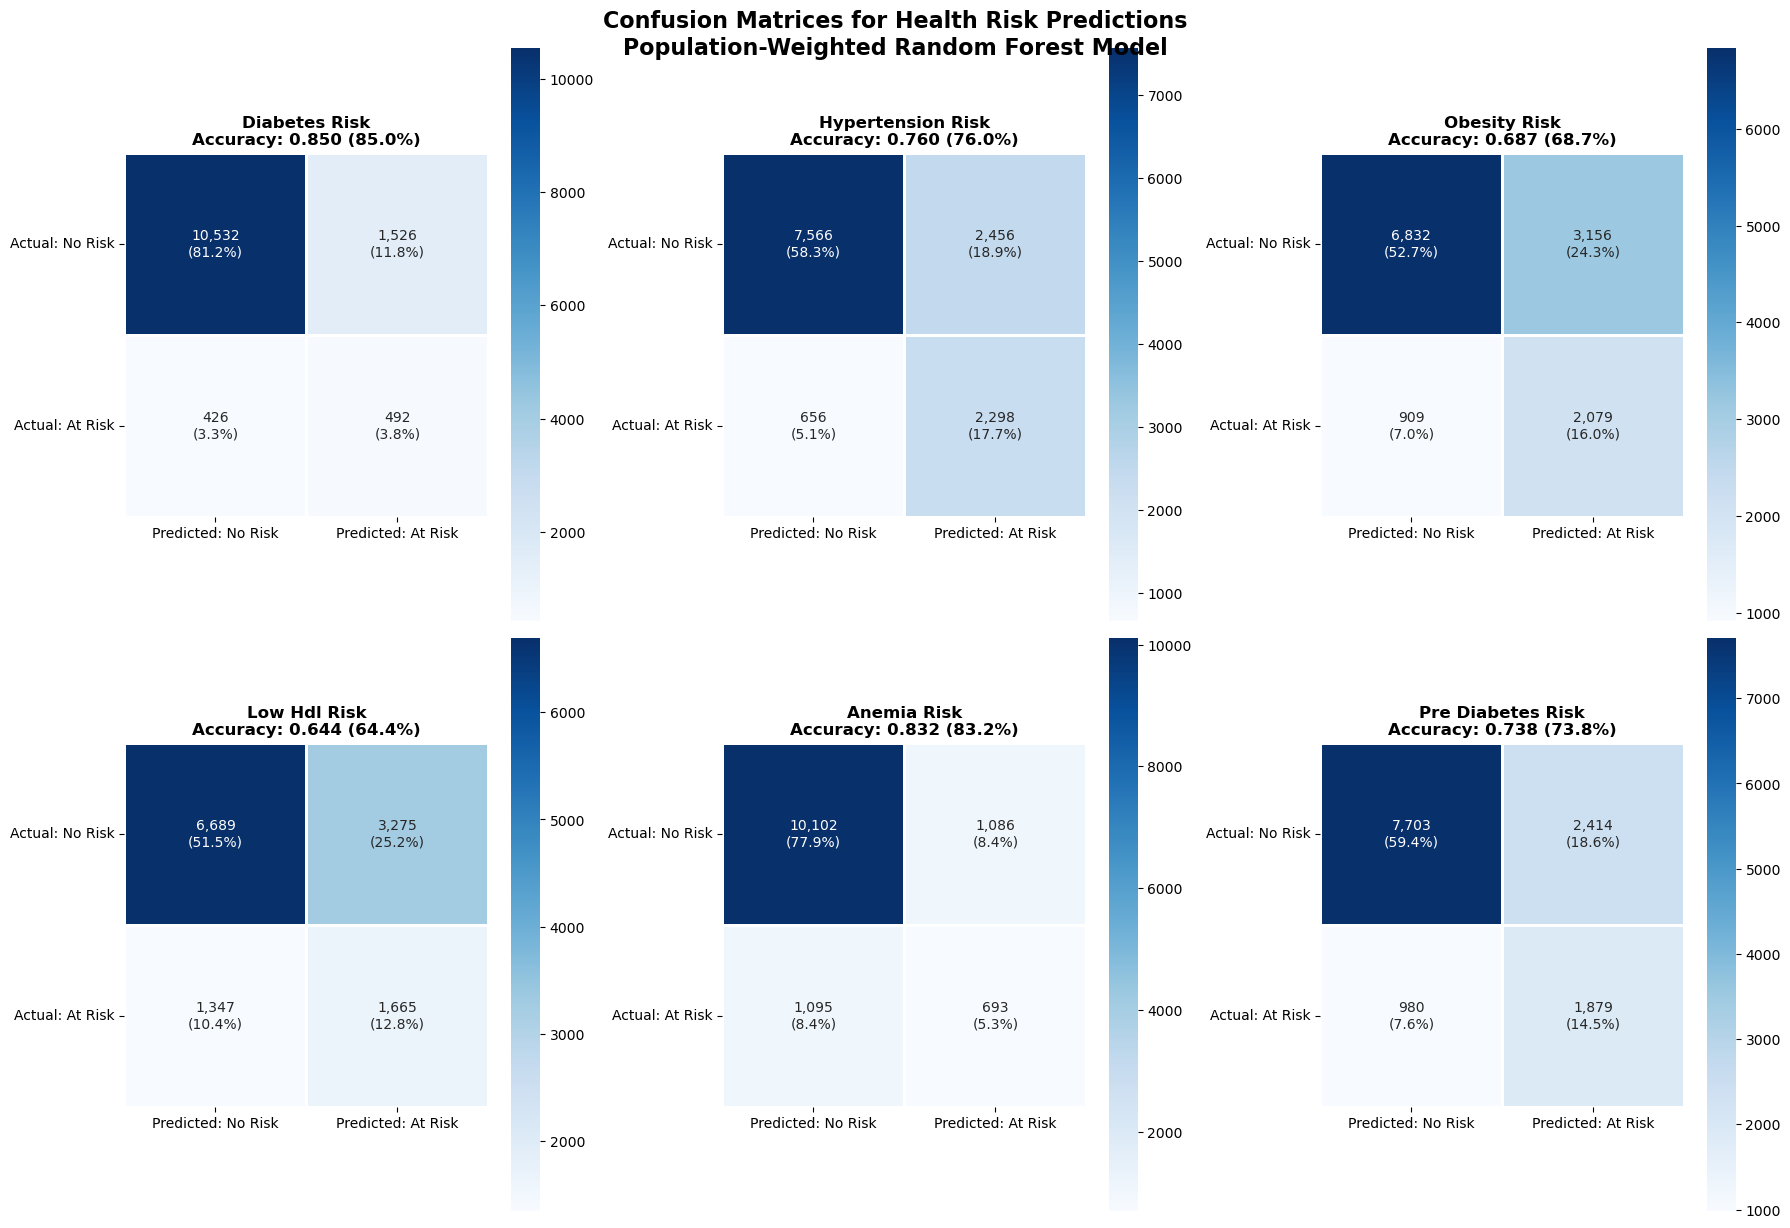

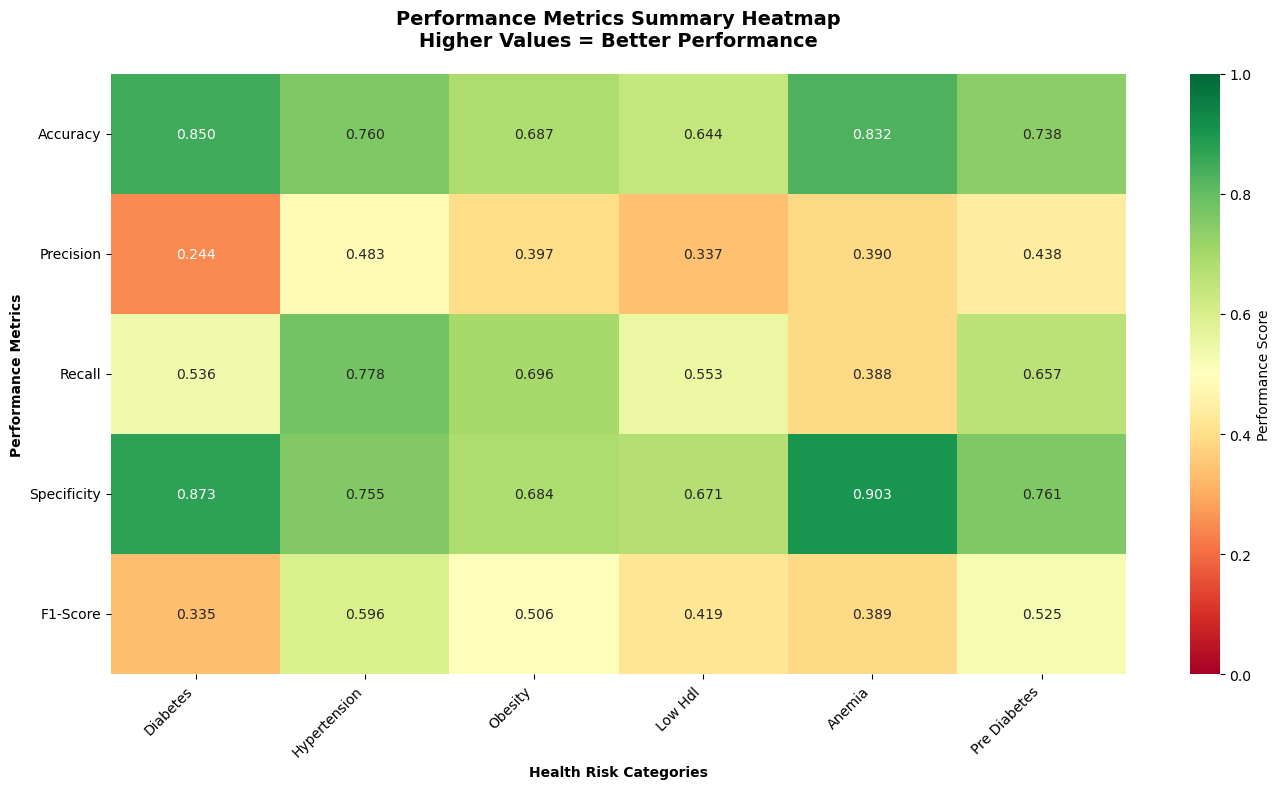

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report

# Convert to numpy arrays if needed
y_test_array = y_test_w.values if hasattr(y_test_w, 'values') else y_test_w
y_pred_array = y_pred_weighted.values if hasattr(y_pred_weighted, 'values') else y_pred_weighted

# Health risk categories
targets = ['diabetes_risk', 'hypertension_risk', 'obesity_risk', 
           'low_hdl_risk', 'anemia_risk', 'pre_diabetes_risk']

# Get confusion matrices (one 2x2 matrix per target)
mcm = multilabel_confusion_matrix(y_test_array, y_pred_array)

print("=== CONFUSION MATRIX DIMENSIONS ===")
print(f"Shape: {mcm.shape} (6 targets, each with 2x2 matrix)")
print(f"Each matrix: [TN FP] [FN TP]")

# ========================================
# VISUALIZATION 1: Individual 2x2 Confusion Matrices
# ========================================

plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Calculate individual accuracies for titles
individual_accuracies = []
for i in range(len(targets)):
    acc = accuracy_score(y_test_array[:, i], y_pred_array[:, i])
    individual_accuracies.append(acc)

for i, (target, acc) in enumerate(zip(targets, individual_accuracies)):
    # Get the 2x2 confusion matrix for this target
    cm = mcm[i]
    
    # Labels for the matrix
    labels = np.array([['True Negative\n(Correct)', 'False Positive\n(Wrong)'],
                       ['False Negative\n(Wrong)', 'True Positive\n(Correct)']])
    
    # Create annotation array with counts and percentages
    total = cm.sum()
    annotations = np.empty_like(cm, dtype=object)
    for row in range(2):
        for col in range(2):
            count = cm[row, col]
            percentage = count / total * 100
            annotations[row, col] = f'{count:,}\n({percentage:.1f}%)'
    
    # Create heatmap
    sns.heatmap(cm, 
                annot=annotations,
                fmt='',
                cmap='Blues',
                cbar=True,
                square=True,
                linewidths=1,
                linecolor='white',
                xticklabels=['Predicted: No Risk', 'Predicted: At Risk'],
                yticklabels=['Actual: No Risk', 'Actual: At Risk'],
                ax=axes[i])
    
    # Formatting
    axes[i].set_title(f'{target.replace("_", " ").title()}\nAccuracy: {acc:.3f} ({acc*100:.1f}%)', 
                      fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.suptitle('Confusion Matrices for Health Risk Predictions\nPopulation-Weighted Random Forest Model', 
             y=1.02, fontsize=16, fontweight='bold')
plt.show()

# ========================================
# VISUALIZATION 2: Performance Summary Heatmap
# ========================================

# Calculate detailed metrics for each target
metrics_data = []
metric_names = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score']

for i, target in enumerate(targets):
    cm = mcm[i]
    tn, fp, fn, tp = cm.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics_data.append([accuracy, precision, recall, specificity, f1])

# Create performance summary heatmap
metrics_df = np.array(metrics_data).T  # Transpose for better visualization
target_names_short = [t.replace('_risk', '').replace('_', ' ').title() for t in targets]

plt.figure(figsize=(14, 8))
sns.heatmap(metrics_df,
            annot=True,
            fmt='.3f',
            cmap='RdYlGn',
            center=0.5,
            vmin=0,
            vmax=1,
            xticklabels=target_names_short,
            yticklabels=metric_names,
            cbar_kws={'label': 'Performance Score'})

plt.title('Performance Metrics Summary Heatmap\nHigher Values = Better Performance', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Health Risk Categories', fontweight='bold')
plt.ylabel('Performance Metrics', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
